In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled
TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)

hard data is conditioned
Running one iteration of the MPS simulation...
One iteration of the MPS simulation completed in 0.01 seconds.
hard data is conditioned
Running one iteration of the MPS simulation...
One iteration of the MPS simulation completed in 0.03 seconds.
hard data is conditioned
Running one iteration of the MPS simulation...
One iteration of the MPS simulation completed in 0.26 seconds.
hard data is conditioned
Running one iteration of the MPS simulation...
One iteration of the MPS simulation completed in 3.49 seconds.


Text(0.5, 1.0, '7771')

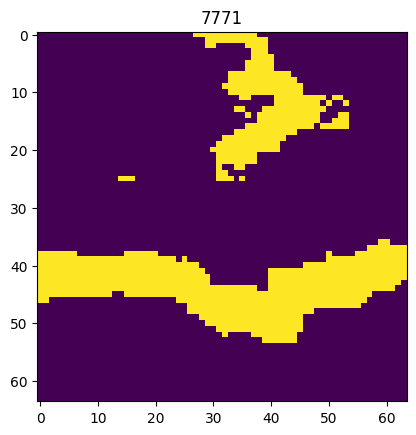

In [4]:
##########################################
##  original demo for 64x64x1           ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 64, 64, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4 

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz,
                                          verbose=True)
plt.imshow(real)
plt.title(f'{random_seed}')

In [29]:
##########################################
##  original demo for 128x128x1         ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 256, 256, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 6 

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz,
                                          verbose=True,
                                          return_muti_scale_real = True)


[MPS] multi-scale MPS starts
------------------------------
<Scale 5 start> Grid size is (8, 8, 1)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.00 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.00 seconds.
<Scale 5 start> Done
no no no
------------------------------
<Scale 4 start> Grid size is (16, 16, 1)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.00 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.02 seconds.
<Scale 4 start> Done
no no no
------------------------------
<Scale 3 start> Grid size is (32, 32, 1)
... starting [curate_training_image]
==> finishing [curate_training_image] in 0.01 seconds
... [_preprocessing_MPS] hard data is conditioned
... starting [_run_mps]
==> finishing [_run_mps] in 0.08 seconds.
<Scale 3 start> Done
no no no
------------------------------
<Scale 2 start>

Text(0.5, 1.0, '7771')

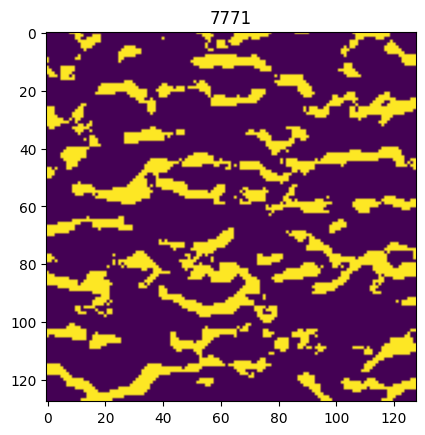

In [30]:
plt.imshow(real[-1])
plt.title(f'{random_seed}')

Running one iteration of the MPS simulation...
One iteration of the MPS simulation completed in 0.92 seconds.


Text(0.5, 1.0, '7771')

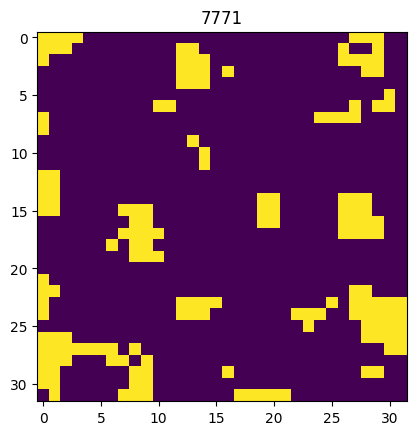

In [26]:
##########################################
##  original demo for 128x128x1         ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, verbose=True)
plt.imshow(real)
plt.title(f'{random_seed}')

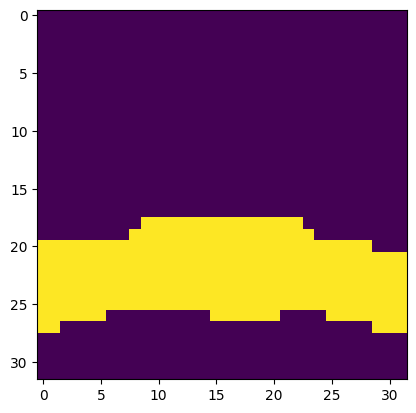

In [29]:
plt.imshow(TI[:32, :32])

In [80]:
soft_data = np.ones((32, 32, 1, 2))*-1
tau = 0.9
soft_data[...,0] = ((1-TI[:32,:32])*tau) + (1-tau)
soft_data[...,1] = (TI[:32,:32]*tau) + (1-tau)

Text(0.5, 1.0, '7771')

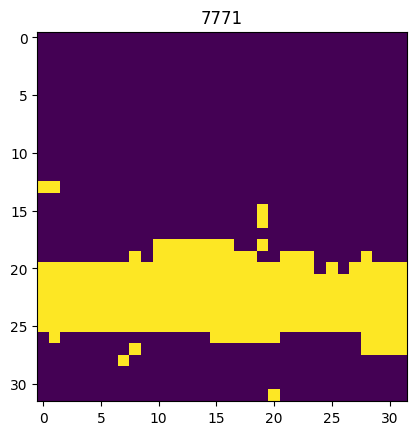

In [81]:
##########################################
##  original demo for 128x128x1         ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz,soft_data=soft_data)
plt.imshow(real)
plt.title(f'{random_seed}')